In [1]:
import pandas as pd
import python_speech_features as mfcc
import os
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import librosa
import plotly.express as px


In [2]:
amr = "Website Data/Amr"
ibrahim = "./Website Data/Ibrahim"
Momen = "./Website Data/Momen"
Mariam = "./Website Data/Mariam"
directories = [Mariam,  ibrahim,Momen,amr]
names = ["Mariam",  "ibrahim","Momen","amr"]
color = ["green","blue","yellow","red"]
averages = [[],[],[],[]]
df = pd.DataFrame({"avg":[],"color":[]})

for i in range(len(directories)):
    
    count = 0

    lis = os.listdir(directories[i])
    for n in lis:
        if count >9:
            break
        sr, audio = read(directories[i]+'/'+n)
        mfcc_feature = mfcc.mfcc(audio, sr, 0.025, 0.01, 20, nfft=1200, appendEnergy=True)


        for arr in mfcc_feature:
            averages[i].append(arr.mean())
            df.loc[len(df)] = [arr.mean(),names[i]]

        count +=1

df.to_csv('GfG.csv', index = False)




(array([ 2.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  3.,  2.,  3.,
         1.,  1.,  4.,  3.,  4.,  3.,  2.,  3.,  6.,  4.,  9.,  7.,  9.,
         9., 16., 15., 31., 20., 22., 38., 24., 34., 38., 31., 50., 50.,
        64., 55., 84., 65., 65., 61., 67., 80., 69., 76., 80., 70., 74.,
        82., 80., 65., 79., 57., 51., 56., 48., 47., 48., 36., 35., 36.,
        40., 35., 33., 34., 19., 26., 26., 25., 17., 20., 21., 22., 22.,
        15., 14., 12.,  9., 10.,  7.,  3.,  8.,  5., 10.,  4.,  5.,  1.,
         3.,  3.,  5.,  1.,  0.,  0.,  1.,  2.,  1.]),
 array([-9.12844609, -8.99203592, -8.85562576, -8.71921559, -8.58280543,
        -8.44639526, -8.3099851 , -8.17357493, -8.03716477, -7.9007546 ,
        -7.76434444, -7.62793427, -7.49152411, -7.35511394, -7.21870378,
        -7.08229361, -6.94588345, -6.80947328, -6.67306312, -6.53665295,
        -6.40024279, -6.26383262, -6.12742246, -5.99101229, -5.85460213,
        -5.71819196, -5.5817818 , -5.44537163, -5.30896147, -5.172551

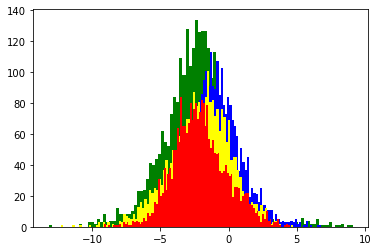

In [3]:
plt.hist(averages[0],color =color[0], bins=100)
plt.hist(averages[1],color =color[1], bins=100)
plt.hist(averages[2],color =color[2], bins=100)
plt.hist(averages[3],color = color[3], bins=100)

In [4]:
pd.read_csv('GfG.csv')

,avg,color
0,-1.391623,Mariam
1,-4.028828,Mariam
2,-3.932844,Mariam
3,-2.421361,Mariam
4,-3.587060,Mariam
...,...,...
10355,-4.059544,amr
10356,-2.291535,amr
10357,-2.187816,amr
10358,-5.740982,amr


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   3.,   3.,   2.,   5.,   3.,   8.,   3.,   4.,   4.,
         12.,   8.,   8.,   8.,   8.,  10.,  14.,  23.,  23.,  24.,  31.,
         41.,  40.,  44.,  47.,  62.,  55.,  52.,  73.,  84.,  81., 109.,
         98., 128., 104., 116., 134., 126., 127., 127., 116.,  96., 113.,
         77.,  50.,  44.,  32.,  43.,  31.,  13.,  14.,  12.,  12.,   5.,
          5.,   6.,   4.,   1.,   2.,   0.,   1.,   5.,   1.,   1.,   2.,
          2.,   2.,   2.,   1.,   3.,   1.,   6.,   2.,   4.,   2.,   2.,
          5.,   1.,   1.,   1.,   3.,   0.,   1.,   1.,   2.,   0.,   1.,
          1.]),
 array([-13.2151299 , -12.99167801, -12.76822612, -12.54477424,
        -12.32132235, -12.09787046, -11.87441858, -11.65096669,
        -11.42751481, -11.20406292, -10.98061103, -10.75715915,
        -10.53370726, -10.31025537, -10.08680349,  -9.8633516 ,
         -9.63989971,  -9.41644783,  -9.19299594,  -8.96954406

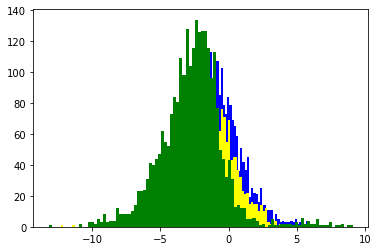

In [5]:

plt.hist(averages[3],color = color[3], bins=100)
plt.hist(averages[1],color =color[1], bins=100)
plt.hist(averages[2],color =color[2], bins=100)
plt.hist(averages[0],color =color[0], bins=100)

In [6]:
color = ["red","blue","green","yellow"]
df = pd.DataFrame({"x":[],"y":[],"z":[],"color":[]})
for i in range(len(directories)):
    lis = os.listdir(directories[i])
    mfccx = []
    mfccy = []
    mfccz = []
    for n in lis:
        index = 0
        sr, audio = read(directories[i]+'/'+n)
        mfcc_feature = mfcc.mfcc(audio, sr, 0.025, 0.01, 20, nfft=1200, appendEnergy=True)
        row = [mfcc_feature[index].mean(),mfcc_feature[index+1].mean(),mfcc_feature[index+2].mean(), color[i]]
        df.loc[len(df)] = row



    

px.scatter_3d(df, x='x', y='y', z='z',color='color')
df.to_csv("3d.csv",index=False)


In [7]:
df

,x,y,z,color
0,-1.391623,-4.028828,-3.932844,red
1,0.025920,0.727899,0.943035,red
2,-1.506207,-1.617614,-5.652935,red
3,-1.481130,-1.088885,-1.685452,red
4,-1.073461,-2.549874,-1.686836,red
...,...,...,...,...
234,-3.214260,0.036627,0.945533,yellow
235,-3.118036,-4.137279,-2.579064,yellow
236,-7.933634,-1.325091,-0.321098,yellow
237,-3.947792,-2.652352,-2.712513,yellow


In [8]:
df

,x,y,z,color
0,-1.391623,-4.028828,-3.932844,red
1,0.025920,0.727899,0.943035,red
2,-1.506207,-1.617614,-5.652935,red
3,-1.481130,-1.088885,-1.685452,red
4,-1.073461,-2.549874,-1.686836,red
...,...,...,...,...
234,-3.214260,0.036627,0.945533,yellow
235,-3.118036,-4.137279,-2.579064,yellow
236,-7.933634,-1.325091,-0.321098,yellow
237,-3.947792,-2.652352,-2.712513,yellow
